In [44]:
import matplotlib.pyplot as plt 
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow.keras import datasets , layers , models

In [4]:
(X_train , Y_train) , (X_test , Y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 64s 0us/step


(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [22]:
# Y_train.shape
Y_train[:5]
Y_train = Y_train.reshape(-1,)#used to reshape the data before this it can be diff.. form
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
classes = ["airplane" , "automobile" , "bird","cat","deer","dog","frog","horse","ship","truck"]

In [25]:
classes[3]

'cat'

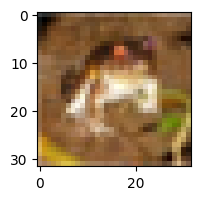

In [30]:
plt.figure(figsize=(6,2))#to resize the size of the image
plt.imshow(X_train[0])#to show the image which is in the index 0
def plot_samples(x,y,index):
 plt.figure(figsize=(6,2))#to resize the size of the image
 plt.imshow(x[index])
 plt.xlabel(classes[y[index]])

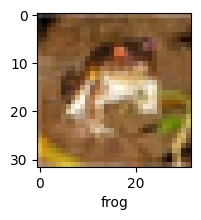

In [31]:
plot_samples(X_train , Y_train , 0)#as per change in the index the photo appear differently

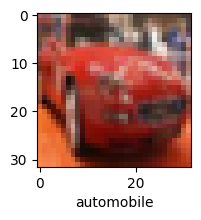

In [32]:
plot_samples(X_train , Y_train , 5)

In [35]:
X_train =X_train / 255#we can divide it by 255 because to normalise the value so it lie between 0 and 1
X_test = X_test / 255
X_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [42]:
ann_model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')

])

ann_model.compile(optimizer='SGD',
       loss='sparse_categorical_crossentropy',
       metrics=['Accuracy'])

ann_model.fit(X_train , Y_train , epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 263s 165ms/step - Accuracy: 0.3081 - loss: 1.9231
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 129ms/step - Accuracy: 0.4215 - loss: 1.6458
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 129ms/step - Accuracy: 0.4543 - loss: 1.5410
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 196s 124ms/step - Accuracy: 0.4723 - loss: 1.4870
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15027s 10s/step - Accuracy: 0.4957 - loss: 1.4317


In [48]:
# this is used to check the prediction score using simple technique
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = ann_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classification report: \n",classification_report(Y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.62      0.43      0.51      1000
           1       0.69      0.49      0.57      1000
           2       0.24      0.67      0.35      1000
           3       0.40      0.13      0.19      1000
           4       0.43      0.30      0.35      1000
           5       0.53      0.25      0.34      1000
           6       0.53      0.52      0.52      1000
           7       0.48      0.60      0.53      1000
           8       0.70      0.55      0.61      1000
           9       0.48      0.65      0.55      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



In [53]:
cnn = models.Sequential([
    layers.Conv2D(filters=32 , kernel_size=(3,3) , activation='relu' , input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64 , kernel_size=(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')

])

c:\Users\baba\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
cnn.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['Accuracy'])



In [55]:
cnn.fit(X_train , Y_train , epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 38ms/step - Accuracy: 0.3721 - loss: 1.7145
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - Accuracy: 0.5849 - loss: 1.1768
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - Accuracy: 0.6442 - loss: 1.0219
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - Accuracy: 0.6732 - loss: 0.9337
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - Accuracy: 0.6969 - loss: 0.8691
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 38ms/step - Accuracy: 0.7193 - loss: 0.8134
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - Accuracy: 0.7370 - loss: 0.7618
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - Accuracy: 0.7440 - loss: 0.7258
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - Accuracy: 0.7620 - loss: 0.6844
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - Accuracy: 0.7743 - loss: 0.6533


In [56]:
cnn.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - Accuracy: 0.6787 - loss: 0.9623


[0.9640059471130371, 0.6779000163078308]

In [57]:
Y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [59]:
Y_test = Y_test.reshape(-1,)
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

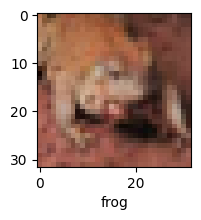

In [63]:
plot_samples(X_test , Y_test , 5)

In [64]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[3.15943509e-02, 1.90943683e-04, 7.63852324e-04, 8.72095644e-01,
        1.33168872e-03, 7.19876513e-02, 8.39482341e-03, 2.21628929e-04,
        1.13435267e-02, 2.07588985e-03],
       [7.80506283e-02, 4.25485909e-01, 1.14733657e-05, 1.17467414e-06,
        4.83203792e-07, 2.31570922e-08, 1.32763756e-09, 1.18909105e-08,
        4.96345490e-01, 1.04789411e-04],
       [4.78318520e-02, 5.01714468e-01, 3.97715339e-04, 1.77573285e-03,
        3.89534747e-04, 1.21093486e-04, 8.01652004e-06, 4.82047442e-04,
        3.96693915e-01, 5.05855381e-02],
       [9.86415863e-01, 6.96689403e-03, 5.27182315e-03, 1.48954423e-04,
        2.25124124e-04, 3.48229082e-06, 2.25315180e-05, 6.98542544e-06,
        8.59538792e-04, 7.87682220e-05],
       [4.31114995e-06, 5.15320316e-05, 5.62230125e-03, 2.42943279e-02,
        7.44316638e-01, 3.31257051e-03, 2.21707568e-01, 2.45011877e-04,
        4.26360610e-04, 1.93411597e-05]], dtype=float32)

In [65]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [67]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

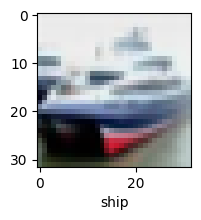

In [68]:
plot_samples(X_test , Y_test, 1)

In [71]:
classes[y_classes[7]]

'deer'

In [73]:
print("classification report: \n",classification_report(Y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.66      0.76      0.70      1000
           1       0.77      0.85      0.81      1000
           2       0.54      0.62      0.58      1000
           3       0.49      0.51      0.50      1000
           4       0.62      0.64      0.63      1000
           5       0.67      0.47      0.55      1000
           6       0.78      0.71      0.74      1000
           7       0.76      0.73      0.74      1000
           8       0.77      0.75      0.76      1000
           9       0.76      0.75      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

